# Oefening 3: Modeloplossing

Importeer numpy en sympy bibliotheken

In [115]:
import sympy as sp
import numpy as np

## 1. Kerstcadeautjes

We maken gebruik van gestructureerde lijsten om prijzen en dieMoetIkHebben op te stellen.

In [116]:
prijzen = [10*n for n in range(1,26)]
print(prijzen)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]


In [117]:
dieMoetIkHebben = np.random.randint(0,2,len(prijzen))
print(dieMoetIkHebben)

[0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0]


Om de totale prijs te berekenen, kunnen we twee opties gebruiken. Optie 1: we gebruiken het dot product in numpy:

In [118]:
totaal = np.dot(prijzen,dieMoetIkHebben)
print(totaal)

1440


Optie 2: we gebruiken de elementsgewijze vermenigvuldiging en sum:

In [119]:
totaal = sum(prijzen*dieMoetIkHebben)
print(totaal)

1440


## 2. Mersenne-getallen

We kunnen de lijst met de eerste 1000 Mersenne-getallen opnieuw opstellen met een gestructureerde lijst.

In [120]:
mersenne = [2**n-1 for n in range(1000)]
print(mersenne)

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911, 1073741823, 2147483647, 4294967295, 8589934591, 17179869183, 34359738367, 68719476735, 137438953471, 274877906943, 549755813887, 1099511627775, 2199023255551, 4398046511103, 8796093022207, 17592186044415, 35184372088831, 70368744177663, 140737488355327, 281474976710655, 562949953421311, 1125899906842623, 2251799813685247, 4503599627370495, 9007199254740991, 18014398509481983, 36028797018963967, 72057594037927935, 144115188075855871, 288230376151711743, 576460752303423487, 1152921504606846975, 2305843009213693951, 4611686018427387903, 9223372036854775807, 18446744073709551615, 36893488147419103231, 73786976294838206463, 147573952589676412927, 295147905179352825855, 590295810358705651711, 1180591620717411303423, 2361183241434822606847, 4722366482869645213695, 9444732965739290427391, 

Met deze lijst kunnen we nu een lijst van de getallen $n$ opmaken waarvoor het Mersenne-getal een priemgetal is. Hiervoor gebruiken we de functie 'isprime' van Sympy.

In [121]:
mersenne_N = [n for n in range(1000) if sp.isprime(mersenne[n])]
print(mersenne_N)
print("Er zijn", len(mersenne_N), "n waarden waarvoor het Mersenne-getal een priemgetal is, binnen de eerste duizend Mersenne-getallen.")

[2, 3, 5, 7, 13, 17, 19, 31, 61, 89, 107, 127, 521, 607]
Er zijn 14 n waarden waarvoor het Mersenne-getal een priemgetal is, binnen de eerste duizend Mersenne-getallen.


Om nu de lijst met bijhorende Mersenne-getallen op te stellen, doen we:

In [122]:
mersenne_priem = [2**n-1 for n in mersenne_N]
print(mersenne_priem)

[3, 7, 31, 127, 8191, 131071, 524287, 2147483647, 2305843009213693951, 618970019642690137449562111, 162259276829213363391578010288127, 170141183460469231731687303715884105727, 6864797660130609714981900799081393217269435300143305409394463459185543183397656052122559640661454554977296311391480858037121987999716643812574028291115057151, 531137992816767098689588206552468627329593117727031923199444138200403559860852242739162502265229285668889329486246501015346579337652707239409519978766587351943831270835393219031728127]


Voor het opstellen van de grafiek hebben we de lijst mersenne_N nodig. Deze lijst vormt de x-as van onze stapfunctie. De y-waarden zijn een oplopende lijst van 0 tot de lengte van mersenne_N (dus range(len(mersenne_N)))

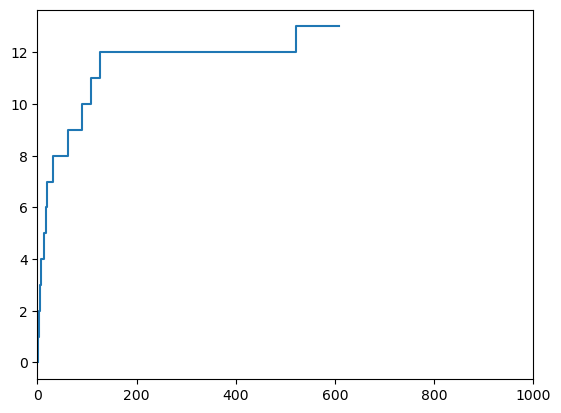

In [123]:
import matplotlib.pyplot as plt
plt.figure()
plt.step(mersenne_N, range(len(mersenne_N)))
plt.xlim(0,1000)
plt.show()

## 3. Stelsel oplossen

We beginnen met het opstellen van de matrix met behulp van Sympy.

In [124]:
A = sp.Matrix([[1,2,4],[3,8,14],[2,6,11]])
print(A)

Matrix([[1, 2, 4], [3, 8, 14], [2, 6, 11]])


Vergeet hierbij niet de dubbele rechte haken!

Nu berekenen we de determinant:

In [125]:
A.det()

2

Om het stelsel op te lossen met 'solve' moeten we eerst een aantal symbolische variabelen definiëren:

In [126]:
x, y, z = sp.symbols("x,y,z")

Vervolgens plaatsen we de verschillende gelijkheden in een lijst in 'solve'

In [127]:
sp.solve([x + 2*y + 4*z - 1, 3*x + 8*y + 14*z - 2, 2*x + 6*y + 11*z - 3], x, y, z)

{x: -2, y: -5/2, z: 2}

Voor de oplossing met matrixrekening bepalen we de inverse van A met 'inv' en vermenigvuldigen we met matrix b

In [128]:
b = sp.Matrix([1,2,3])
print(b)

Matrix([[1], [2], [3]])


Waarbij we slechts enkele haken gebruiken, omdat we een vector hebben.

In [129]:
A.inv()*b

Matrix([
[  -2],
[-5/2],
[   2]])

## 4. Matrixproduct

Voor deze oefening maken we gebruik van Numpy. We zullen de gestructureerde lijsten dus omzetten naar numpy-arrays met de 'array' functie.

In [130]:
N = 100 #10 of 100 of 1000

In [131]:
A = np.array([[i+j for i in range(N)] for j in range(N)])
print(A)

[[  0   1   2 ...  97  98  99]
 [  1   2   3 ...  98  99 100]
 [  2   3   4 ...  99 100 101]
 ...
 [ 97  98  99 ... 194 195 196]
 [ 98  99 100 ... 195 196 197]
 [ 99 100 101 ... 196 197 198]]


In [132]:
B = np.array([[i*j for i in range(N)] for j in range(N)])
print(B)

[[   0    0    0 ...    0    0    0]
 [   0    1    2 ...   97   98   99]
 [   0    2    4 ...  194  196  198]
 ...
 [   0   97  194 ... 9409 9506 9603]
 [   0   98  196 ... 9506 9604 9702]
 [   0   99  198 ... 9603 9702 9801]]


Om de tijdsduur te berekenen importeren we de 'time' module

In [133]:
import time

We berekenen nu het matrixproduct:

In [134]:
tic = time.process_time() #bepaal de starttijd
C = np.dot(A,B)
print(C)
toc = time.process_time() #bepaal de eindtijd
print(toc-tic)

[[       0   328350   656700 ... 31849950 32178300 32506650]
 [       0   333300   666600 ... 32330100 32663400 32996700]
 [       0   338250   676500 ... 32810250 33148500 33486750]
 ...
 [       0   808500  1617000 ... 78424500 79233000 80041500]
 [       0   813450  1626900 ... 78904650 79718100 80531550]
 [       0   818400  1636800 ... 79384800 80203200 81021600]]
0.0028140000000007603


We bepalen nu hetzelfde product door gebruik van de formule:

In [135]:
tic = time.process_time() #bepaal de starttijd

C = [[sum(A[i][k] * B[k][j] for k in range(N)) for j in range(N)] for i in range(N)]
print(C)

toc = time.process_time() #bepaal de eindtijd
print(toc-tic)

[[0, 328350, 656700, 985050, 1313400, 1641750, 1970100, 2298450, 2626800, 2955150, 3283500, 3611850, 3940200, 4268550, 4596900, 4925250, 5253600, 5581950, 5910300, 6238650, 6567000, 6895350, 7223700, 7552050, 7880400, 8208750, 8537100, 8865450, 9193800, 9522150, 9850500, 10178850, 10507200, 10835550, 11163900, 11492250, 11820600, 12148950, 12477300, 12805650, 13134000, 13462350, 13790700, 14119050, 14447400, 14775750, 15104100, 15432450, 15760800, 16089150, 16417500, 16745850, 17074200, 17402550, 17730900, 18059250, 18387600, 18715950, 19044300, 19372650, 19701000, 20029350, 20357700, 20686050, 21014400, 21342750, 21671100, 21999450, 22327800, 22656150, 22984500, 23312850, 23641200, 23969550, 24297900, 24626250, 24954600, 25282950, 25611300, 25939650, 26268000, 26596350, 26924700, 27253050, 27581400, 27909750, 28238100, 28566450, 28894800, 29223150, 29551500, 29879850, 30208200, 30536550, 30864900, 31193250, 31521600, 31849950, 32178300, 32506650], [0, 333300, 666600, 999900, 1333200, 

## 5. Functie

We starten met de definitie van de functie:

In [136]:
def f(x,y): return x**3-x+y**3-y

In [137]:
x, y = sp.symbols("x,y")

Vervolgens plotten we de functie:

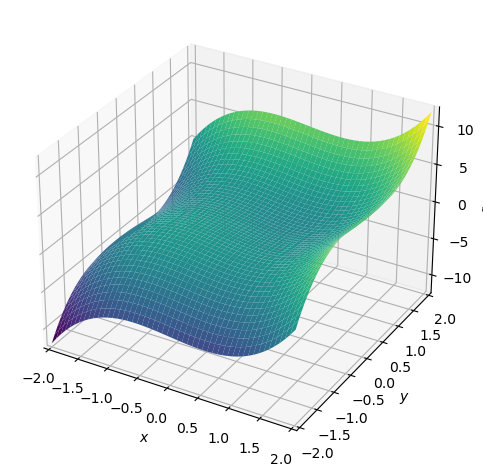

In [138]:
plotF = sp.plotting.plot3d(f(x,y),(x,-2,2),(y,-2,2))

We maken nu een gradiënt-functie. Vergeet niet om substituties toe te passen!!!

In [139]:
def gradient(x0,y0): return sp.Matrix([sp.diff(f(x,y),x), sp.diff(f(x,y),y)]).subs(x,x0).subs(y,y0)

In [140]:
gradient(x,y)

Matrix([
[3*x**2 - 1],
[3*y**2 - 1]])

De kritieke punten vinden we door 'solve' toe te passen op deze gradient.

In [141]:
kritieke = sp.solve(gradient(x,y),x,y)
print(kritieke)

[(-sqrt(3)/3, -sqrt(3)/3), (-sqrt(3)/3, sqrt(3)/3), (sqrt(3)/3, -sqrt(3)/3), (sqrt(3)/3, sqrt(3)/3)]


De Hessiaan kunnen we op analoge wijze construeren:

In [142]:
def hessiaan(x0,y0): return sp.Matrix([[sp.diff(f(x,y),x,x), sp.diff(f(x,y),x,y)],[sp.diff(f(x,y),y,x), sp.diff(f(x,y),y,y)]]).subs(x,x0).subs(y,y0)

In [143]:
hessiaan(x,y)

Matrix([
[6*x,   0],
[  0, 6*y]])

De berekening van de (lokale) extrema:

In [144]:
determinant = [hessiaan(punt[0],punt[1]).det() for punt in kritieke]
print(determinant)

[12, -12, -12, 12]


In [145]:
orientatie = [hessiaan(punt[0],punt[1])[0,0] for punt in kritieke]
print(orientatie)

[-2*sqrt(3), -2*sqrt(3), 2*sqrt(3), 2*sqrt(3)]
